# Import Library

In [527]:
import math
import imblearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from xgboost import XGBClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.svm import SVR, LinearSVC, NuSVC, LinearSVR, NuSVR
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier, NearestCentroid, RadiusNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, GradientBoostingClassifier, \
     AdaBoostClassifier, RandomForestClassifier, AdaBoostRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression, SGDClassifier, LogisticRegressionCV, RidgeClassifier, ARDRegression, BayesianRidge, \
     ElasticNetCV, Lars, LarsCV, Lasso, LassoCV, LassoLars, LassoLarsCV, LassoLarsIC, OrthogonalMatchingPursuit, OrthogonalMatchingPursuitCV, \
     PassiveAggressiveRegressor, PoissonRegressor, RANSACRegressor, Ridge, RidgeCV, SGDRegressor, TheilSenRegressor, TweedieRegressor

# Load Data

In [528]:
data = pd.read_csv("../Dataset/bodyfat.csv")
data.sample(5)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
122,1.0652,14.7,40,160.25,68.75,36.9,99.3,83.3,97.5,60.5,38.7,22.6,34.4,28.0,17.6
158,1.0704,12.5,30,136.50,68.75,35.9,88.7,76.6,89.8,50.1,34.8,21.8,27.0,34.9,16.9
95,1.0991,17.4,53,224.50,77.75,41.1,113.2,99.2,107.5,61.7,42.3,23.2,32.9,30.8,20.4
57,1.0356,28.0,62,201.25,69.50,40.5,111.5,104.2,105.8,61.8,39.8,22.7,37.7,30.9,19.2
237,1.0372,27.3,63,219.15,69.50,40.2,117.6,113.8,111.8,63.4,41.1,22.3,35.1,29.6,18.5


# Inital Analysis

In [529]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB
None


In [530]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Density,252.0,1.055574,0.019031,0.995,1.0414,1.0549,1.0704,1.1089
BodyFat,252.0,19.150794,8.368740,0.000,12.4750,19.2000,25.3000,47.5000
Age,252.0,44.884921,12.602040,22.000,35.7500,43.0000,54.0000,81.0000
Weight,252.0,178.924405,29.389160,118.500,159.0000,176.5000,197.0000,363.1500
Height,252.0,70.148810,3.662856,29.500,68.2500,70.0000,72.2500,77.7500
Neck,252.0,37.992063,2.430913,31.100,36.4000,38.0000,39.4250,51.2000
Chest,252.0,100.824206,8.430476,79.300,94.3500,99.6500,105.3750,136.2000
Abdomen,252.0,92.555952,10.783077,69.400,84.5750,90.9500,99.3250,148.1000
Hip,252.0,99.904762,7.164058,85.000,95.5000,99.3000,103.5250,147.7000
Thigh,252.0,59.405952,5.249952,47.200,56.0000,59.0000,62.3500,87.3000


In [392]:
data.duplicated().sum()

0

### Get Numerical and Categorical Columns

In [531]:
numerical_column = [column for column in data.columns if data[column].dtype != 'object']
print(numerical_column)
categorical_column = [column for column in data.columns if data[column].dtype == 'object']
print(categorical_column)

['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']
[]


### Cleaning nan Value 

In [532]:
def set_numerical_nan(data, numerical_column):
    data[numerical_column] = data[numerical_column].fillna(data[numerical_column].mean())
    return data
data = set_numerical_nan(data, numerical_column)

# Data Exploration

### Distribution value for numerical columns

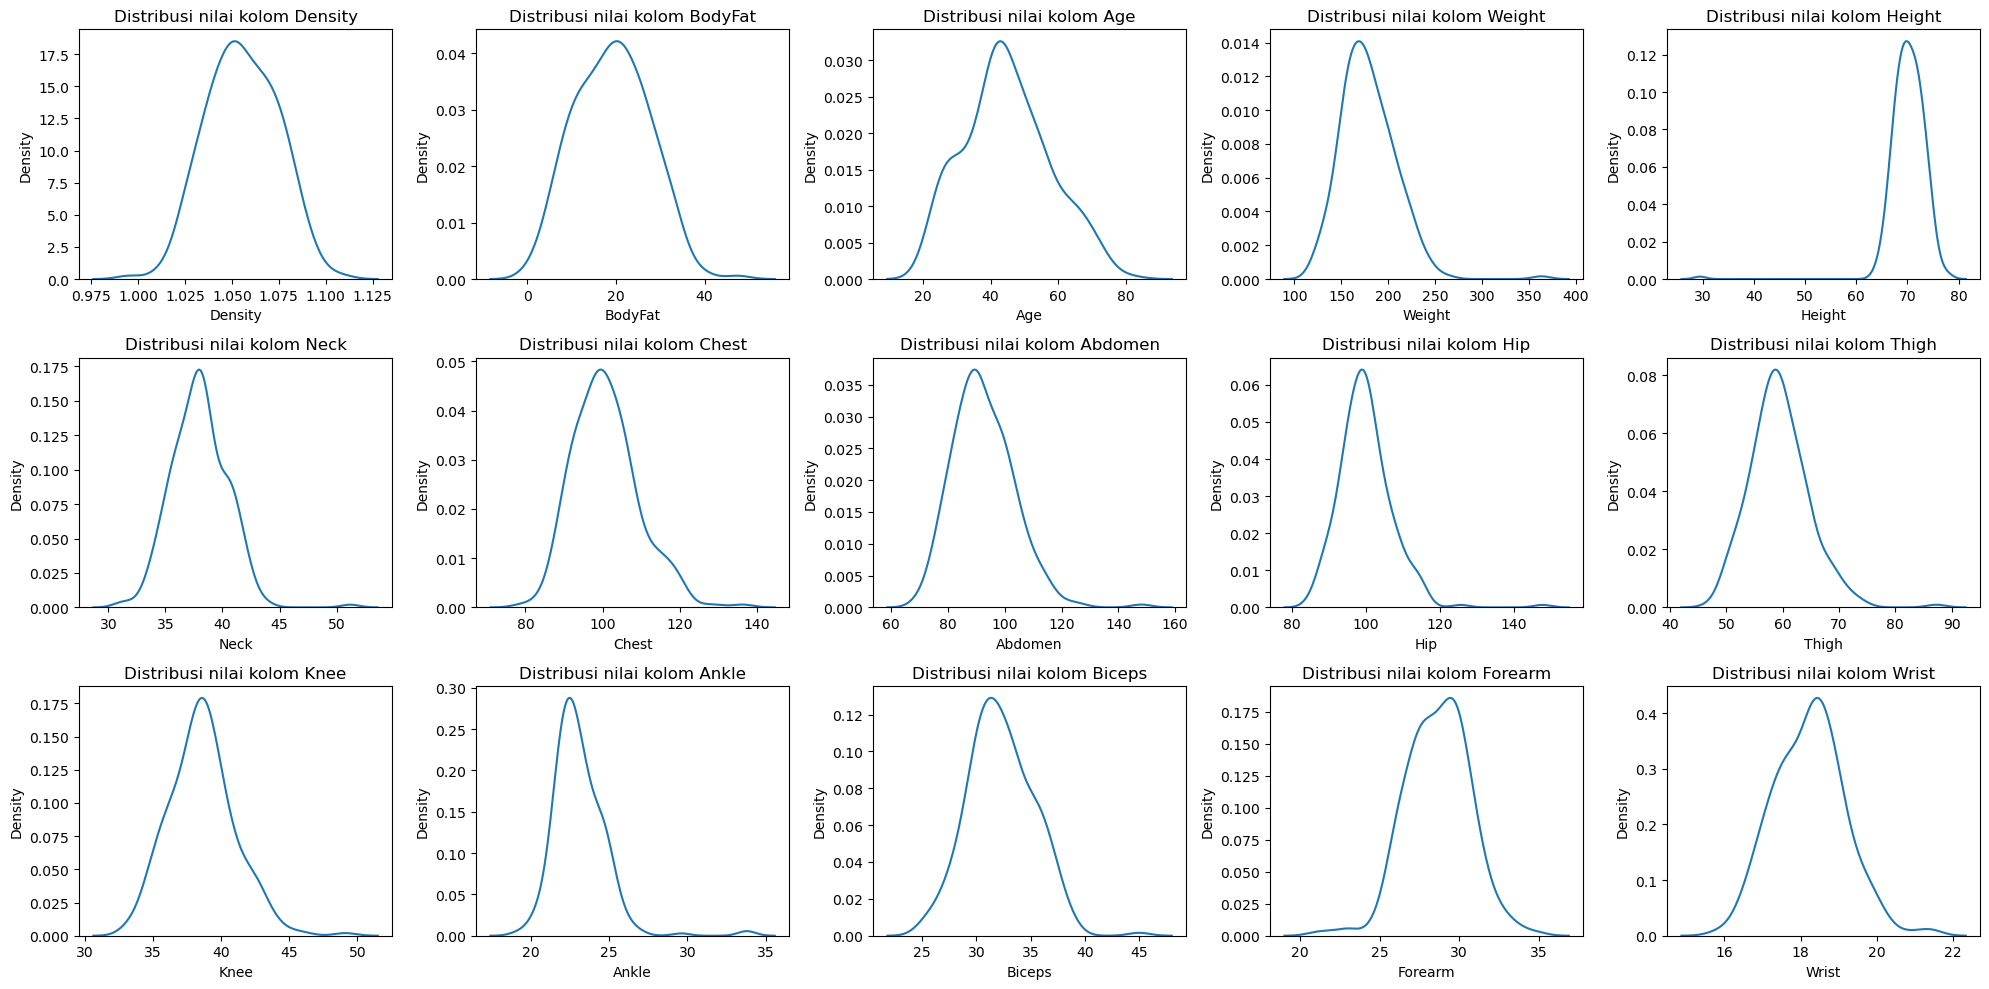

In [434]:
num_rows = 3
num_cols = math.ceil(len(numerical_column) / num_rows)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
for i, column in enumerate(numerical_column):
    row = i // num_cols
    col = i % num_cols
    sns.kdeplot(data, x=column, ax=axes[row, col]).set_title("Distribusi nilai kolom " + column)
    
for i in range(len(numerical_column), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

### The range of values in the numerical column

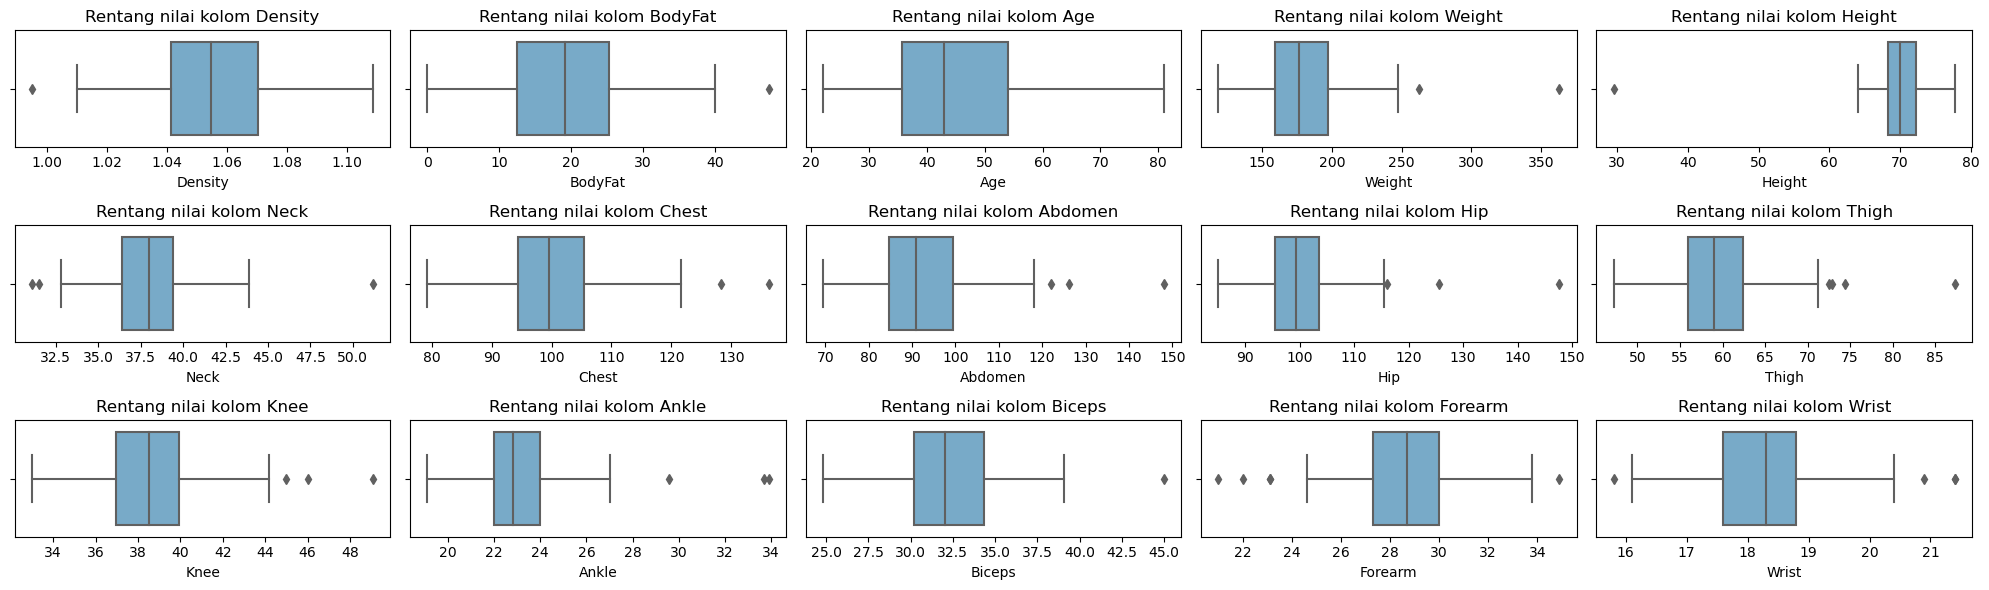

In [533]:
num_rows = 3
num_cols = math.ceil(len(numerical_column) / num_rows)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 6))
for i, column in enumerate(numerical_column):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(x=data[column], ax=axes[row, col], palette="Blues").set_title("Rentang nilai kolom " + column)
    
for i in range(len(numerical_column), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

### Remove Outlier from the data

In [322]:
# Q1   = data.quantile(0.25)
# Q3   = data.quantile(0.75)
# IQR  = Q3-Q1
# data = data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)].dropna()
# data.shape

(196, 18)

# Data correlation between columns

<Axes: >

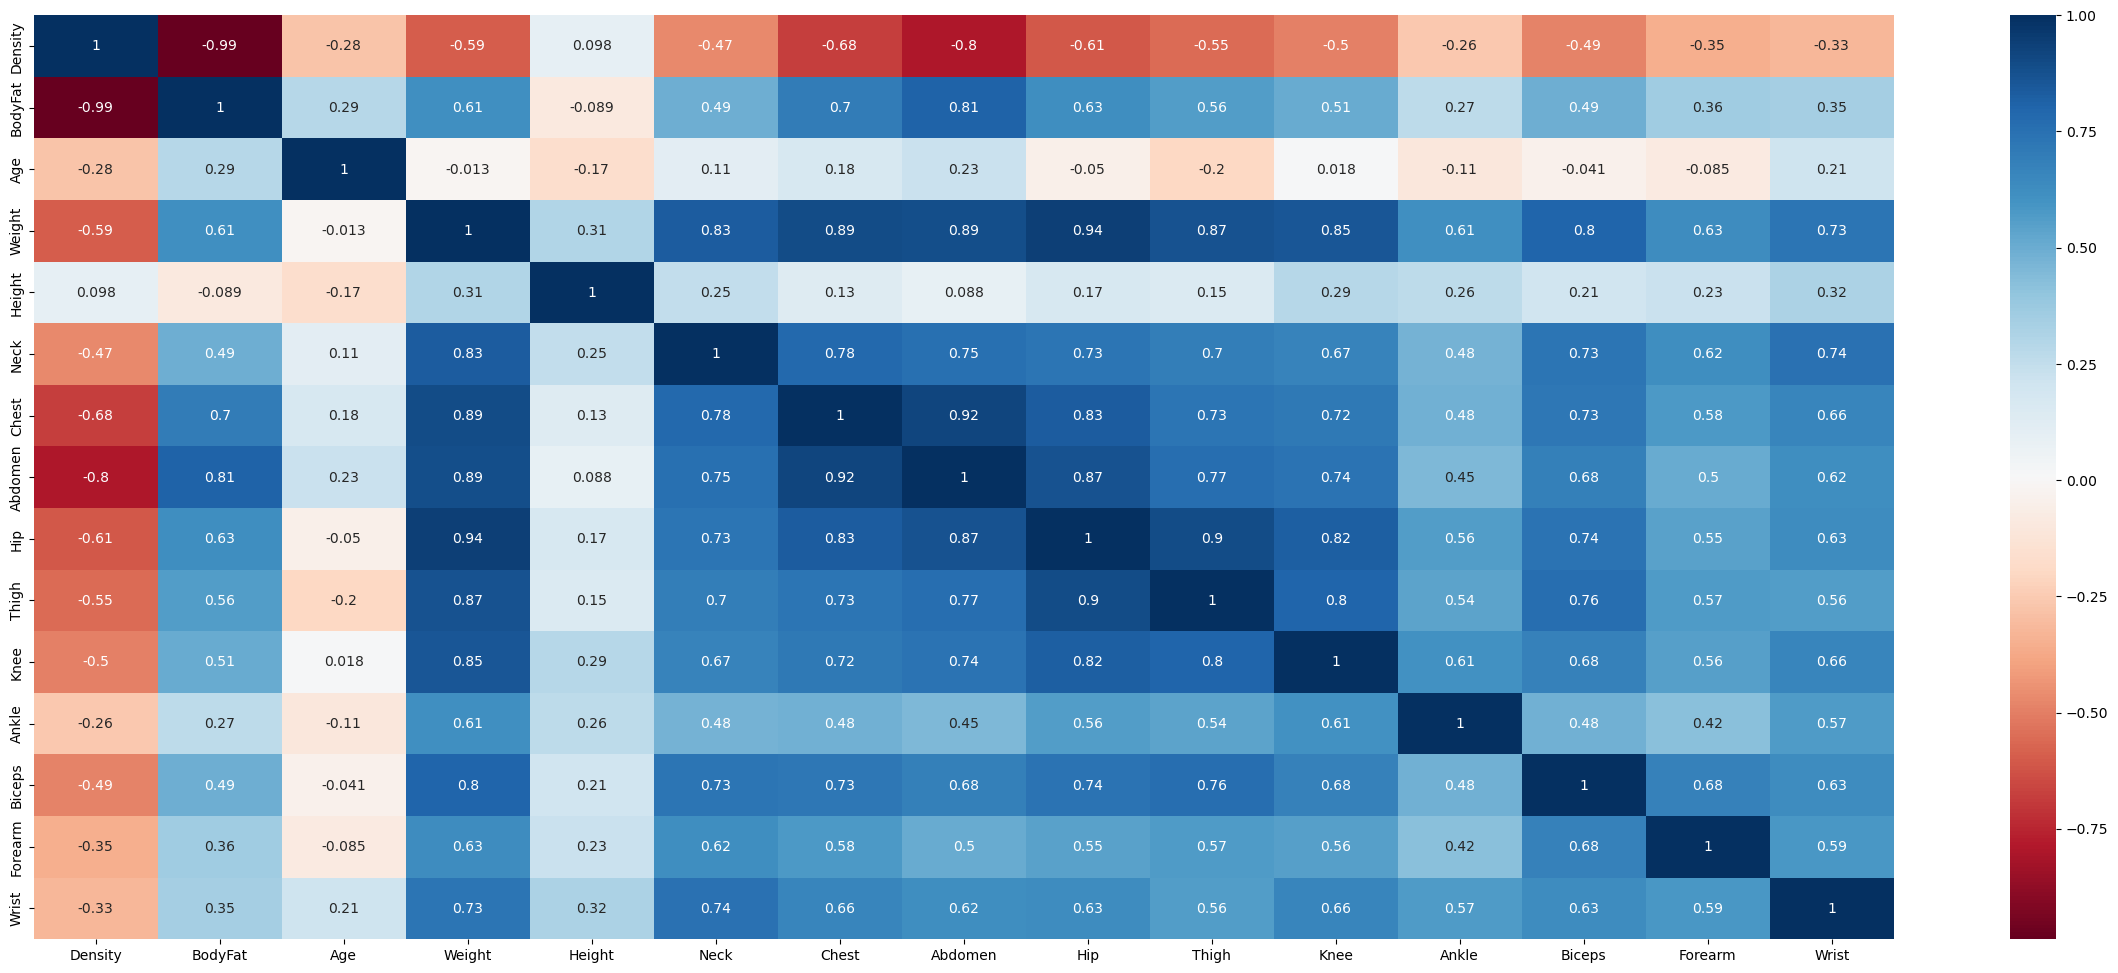

In [534]:
datacorr = data.copy()

encoder = LabelEncoder()
for column in categorical_column:
    datacorr[column] = encoder.fit_transform(datacorr[column])

plt.figure(figsize=(30,12))
corr = datacorr.corr()
sns.heatmap(corr, annot=True, cmap="RdBu")

# Data Preprocessing

In [437]:
data['Bmi'] = 703*data['Weight']/(data['Height']*data['Height'])
data['ACratio'] = data['Abdomen']/data['Chest']
data['HTratio'] = data['Hip']/data['Thigh']
data['BFratio'] = data['Biceps']/data['Forearm']
data['JacksonPollock'] = (1.2 * data['Bmi']) + (0.23 * data['Age']) - 16.2

# data = data.drop(columns=['Weight','Height','Abdomen','Chest','Hip','Thigh'])

In [439]:
data

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Bmi,ACratio,HTratio,BFratio,JacksonPollock
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.624460,0.915145,1.601695,1.167883,17.439353
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.332048,0.886752,1.681431,1.055363,16.858458
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.666315,0.917537,1.664430,1.142857,18.459578
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.880784,0.848723,1.683860,1.102041,19.636941
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.514854,1.027749,1.612342,1.162455,19.937825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5,21.024226,0.937220,1.790323,0.996109,25.129071
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,29.044437,0.967742,1.753356,1.230769,35.213324
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0,30.138946,1.003600,1.686567,1.150735,36.526736
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8,26.979981,0.935365,1.746429,1.037415,32.735977


In [535]:
X = data.drop(columns=['Density', 'BodyFat'])
Y = data['Density']
# Y = data['BodyFat']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Split data to Train and Test data

In [536]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {(X_train.shape)}')
print(f'Total # of sample in test dataset: {(X_test.shape)}')

Total # of sample in whole dataset: 252
Total # of sample in train dataset: (201, 13)
Total # of sample in test dataset: (51, 13)


# Model Prediction

### Prepare Model

In [537]:
def algorithms():
    algorithms = [
                           ### Regression ###
                  ('ARD',ARDRegression()),
                  ('AdaBoost',AdaBoostRegressor(n_estimators=274, random_state=42)),
                  ('Bayesian Ridge',BayesianRidge()),
                  ('Decision Tree', DecisionTreeRegressor(max_depth=4)),
                  ('Elastic Net CV', ElasticNetCV(random_state=42)),
                  ('Gradient Boost', GradientBoostingRegressor(n_estimators=14, learning_rate=0.1, max_depth=50, random_state=42)),
                  ('Hist Gradient B',HistGradientBoostingRegressor()),
                  ('KNN', KNeighborsRegressor(n_neighbors=15)), 
                  ('Lars',Lars(n_nonzero_coefs=16)),
                  ('Lars CV',LarsCV(cv=198)),
                  ('Lasso',Lasso(alpha=(2620)/1000000000)),
                  ('Lasso CV', LassoCV(cv=12, random_state=42)),
                  ('LassoLars', LassoLars(alpha=(2487)/1000000000)),
                  ('Lasso Lars CV', LassoLarsCV(cv=12)),
                  ('Linear Regression', LinearRegression()), 
                  ('Linear SVR',  LinearSVR(random_state=42, tol=(1)/1000000000)), 
                  ('Nu SVR',NuSVR(C=1, nu=(2)/100)),
                  ('Orthogonal MP', OrthogonalMatchingPursuit()),
                  ('Orthogonal MP CV', OrthogonalMatchingPursuitCV(cv=2)),
                  ('Random Forrest', RandomForestRegressor(n_estimators=227, max_depth=100, random_state=42)),
                  ('Ridge', Ridge(alpha=(1)/1000000000)),
                  ('RidgeCV', RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])),
                  ]
    return algorithms

def prepare_model(algorithm):
    model = algorithm
    model.fit(X_train, y_train)
    return model

def calculate_regression_performance(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = round(model.score(X_train,y_train), 4)*100
    mse = round(mean_squared_error(y_test, y_pred), 4)
    r2  = round(r2_score(y_test, y_pred), 3)
    return acc, mse, r2

def regression_result(result, name, acc, mse, r2):
    result.append((name, acc, mse, r2))
    return result

### Training and Evaluate the model

In [538]:
%%time
result = []
trained_models = []

algorithms = algorithms()

for index, tup in enumerate(algorithms):
    model = prepare_model(tup[1])
    trained_models.append((tup[0],model))

    # Calculate the Accuracy, Mean Squared Error (MSE), and R-squared score
    acc, mse, r2= calculate_regression_performance(model,X_train, y_train, X_test, y_test)
    result = regression_result(result, tup[0], acc, r2, mse)

regression_results_df = pd.DataFrame(result, columns=('Model Name', 'Accuracy', 'R-Square', 'MSE'))
regression_results_df.sort_values(by=['R-Square', 'Accuracy'], ascending=False)

CPU times: total: 3.31 s
Wall time: 1.2 s


,Model Name,Accuracy,R-Square,MSE
1,AdaBoost,83.82,0.702,0.0001
19,Random Forrest,95.01,0.672,0.0001
6,Hist Gradient B,93.47,0.632,0.0001
8,Lars,74.56,0.628,0.0001
9,Lars CV,74.56,0.628,0.0001
14,Linear Regression,74.56,0.628,0.0001
20,Ridge,74.56,0.628,0.0001
21,RidgeCV,74.56,0.628,0.0001
12,LassoLars,74.56,0.625,0.0001
10,Lasso,74.55,0.624,0.0001


### Find optimal hyperparameter for some models

In [521]:
%%time
max_value = 0
num_value = 0

start_num = 0
n_number = 5

for i in tqdm(range(start_num, n_number+1)):
    ### Regression ###
    # model = AdaBoostRegressor( n_estimators=i, random_state=42)
    # model = DecisionTreeRegressor(max_depth=i)
    # model = GradientBoostingRegressor(n_estimators=i, learning_rate=0.1, max_depth=50, random_state=42)
    # model = KNeighborsRegressor(n_neighbors=i)
    # model = Lars(n_nonzero_coefs=i)
    # model = LarsCV(cv=i)
    # model = Lasso(alpha=(i)/1000000000)
    # model = LassoCV(cv=i, random_state=42)
    # model = LassoLars(alpha=(i)/1000000000)
    # model = LassoLarsCV(cv=i)
    # model = LinearSVR(random_state=42, tol=(i)/1000000000)
    # model = NuSVR(C=1, nu=(i)/100)
    # model = OrthogonalMatchingPursuitCV(cv=i+1)
    # model = RandomForestRegressor(n_estimators=i, max_depth=100, random_state=42)
    # model = Ridge(alpha=(i)/1000000000)
    model = TweedieRegressor(power = i)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    if (r2> max_value):
        max_value = r2
        num_value = i
    
print(max_value)
print(num_value)

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 459.64it/s]

0.12723436697595225
1
CPU times: total: 0 ns
Wall time: 14.1 ms


In [691]:
def regression_algorithms():
    algorithms = [
                    ### Classification ###
                  ('AdaBoost', AdaBoostClassifier(n_estimators=51, learning_rate=0.1, random_state=42)),
                  ('Bernoulli NB', BernoulliNB()),
                  ('Gradient Boost', GradientBoostingClassifier(n_estimators=46, learning_rate=0.1, max_depth=50, random_state=42)),
                  ('KNN', KNeighborsClassifier(n_neighbors=6)),
                  ('Linear SVC',LinearSVC(random_state=42, tol=1e-1)),
                  ('Linear Regression CV', LogisticRegressionCV(cv=2, random_state=42)),
                  ('Multinomial NB', MultinomialNB()),
                  ('Nu SVC', NuSVC()),
                  ('Random Forest',RandomForestClassifier(max_depth=7, random_state=42)),
                  ('Ridge',RidgeClassifier()),
                  ('SGD', SGDClassifier(max_iter=63,loss='hinge', penalty='l2', alpha=1e-3, random_state=42, tol=None)),
        
                    ### Regression ###
                  ('ARD',ARDRegression()),
                  ('AdaBoost',AdaBoostRegressor(n_estimators=27, random_state=42)),
                  ('Bayesian Ridge',BayesianRidge()),
                  ('Decision Tree', DecisionTreeRegressor(max_depth=4)),
                  ('Elastic Net CV', ElasticNetCV(random_state=42)),
                  ('Gradient Boost', GradientBoostingRegressor(n_estimators=12, learning_rate=0.1, max_depth=50, random_state=42)),
                  ('Hist Gradient B',HistGradientBoostingRegressor()),
                  ('Kernel Ridge',KernelRidge(alpha=.1)),
                  ('KNN', KNeighborsRegressor(n_neighbors=4)), 
                  ('Lars',Lars(n_nonzero_coefs=26)),
                  ('Lars CV',LarsCV(cv=6)),
                  ('Lasso',Lasso(alpha=1e-4)),
                  ('Lasso CV', LassoCV(cv=6, random_state=42)),
                  ('Lasso Lars', LassoLars(alpha=1e-5)),
                  ('Lasso Lars CV', LassoLarsCV(cv=6)),
                  ('Lasso Lars IC', LassoLarsIC(criterion='aic')),
                  ('Linear Regression', LinearRegression()), 
                  ('Linear SVR', LinearSVR(random_state=42, tol=1e-5)),
                  ('MLP', MLPRegressor(hidden_layer_sizes=(10000,), max_iter=100, random_state=42)),
                  ('Nu SVR',NuSVR(C=1, nu=0.6)),
                  ('OrthogonalMatchingPursuit', OrthogonalMatchingPursuit()),
                  ('OrthogonalMatchingPursuitCV', OrthogonalMatchingPursuitCV(cv=3)),
                  ('Passive Aggressive',PassiveAggressiveRegressor(max_iter=4, random_state=42, tol=1e-1)),
                  ('Poisson', PoissonRegressor()),
                  ('Random Forrest', RandomForestRegressor(n_estimators=14, max_depth=50, random_state=42)),
                  ('RANSAC', RANSACRegressor(random_state=42)),
                  ('Ridge', Ridge(alpha=.1)),
                  ('RidgeCV', RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])),
                  ('SGD', SGDRegressor(max_iter=116, tol=1e-4, random_state=42)),
                  ('SVR', SVR(kernel='rbf')), 
                  ('TheilSen',TheilSenRegressor(random_state=42)),
                  ('Tweedie', TweedieRegressor(power = 1)),
                  ]
    return algorithms